<center>
    <h1>Evaluation Metrics Classification Model</h1>
</center>

<b>Reference Link: </b>https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-problems-with-implementation-in-python-a20193b4f2c3

In [1]:
# Importing necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

%matplotlib inline

## Loading the breast cancer data set

In [2]:
diabetes_data = load_breast_cancer()

## Creating independent and dependent variables

In [3]:
X = diabetes_data.data
y = diabetes_data.target

## Splitting the data into training and testing set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

Train Data: (455, 30), (455,)
Test Data: (114, 30), (114,)


## Training a binary classifier and making predictions

In [6]:
classifier = RandomForestClassifier(random_state=24)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

## Evaluating the model

### 1. Accuracy

<img src="https://miro.medium.com/max/1320/0*FRiaA5F0U4V7j-un.png" />

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)*100}%")

Accuracy of the classifier is: 95.6140350877193%


### 2. Confusion Matrix

<img src="https://miro.medium.com/max/1134/0*GVy0nOoXSmZ0VL_p.png" />

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

Confusion Matrix:
[[39  2]
 [ 3 70]]


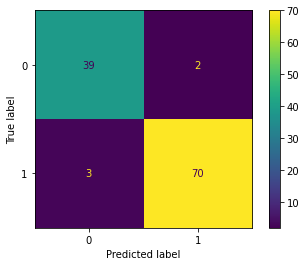

In [11]:
# confusion_matrix funnction a matrix containing the summary of predictions
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("=="*50)

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

### 3. Precision

<img src="https://miro.medium.com/max/1320/0*vN7ertC_kBKSNZsN.png" />

In [12]:
from sklearn.metrics import precision_score

In [13]:
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")

Precision Score of the classifier is: 0.9722222222222222


### 4. Recall

<img src="https://miro.medium.com/max/1320/0*OBYOX0Zv8x8Mb24Z.png" />

In [14]:
from sklearn.metrics import recall_score

In [15]:
# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

Recall Score of the classifier is: 0.958904109589041


### 5. F1 Score

<img src="https://miro.medium.com/max/1068/0*l15zVjRsQ6pw-Pbj.png" />

In [16]:
from sklearn.metrics import f1_score

In [17]:
# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

F1 Score of the classifier is: 0.9655172413793104


### 6. AUC-ROC Curve

ROC is Receiver Operating Characteristic Curve and AUC is Area Under Curve.<br/>
<img src="https://miro.medium.com/max/596/0*LTnn45i-HbBzZTb0.png" /><br/>
<img src="https://miro.medium.com/max/596/0*bTbVhkIq72GuWolc.png" /><br/>

In [18]:
from sklearn.metrics import roc_curve, auc

AUC for our classifier is: 0.9772803207484129


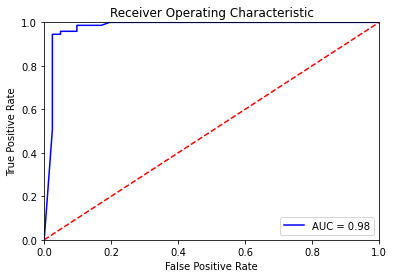

In [17]:
class_probabilities = classifier.predict_proba(X_test)
preds = class_probabilities[:, 1]

fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()